In [2]:
import numpy as np

In [3]:
class ABCD:
    'ABCD matrix method'

    def __init__(self, length, alpha, beta, couplingCapacitance, charImpedance, loadResistance, freqRange, freqStep):
        self.length = length
        self.gamma = alpha + 1j*beta
        self.couplingCapacitance = couplingCapacitance
        self.charImpedance = charImpedance
        self.loadResistance = loadResistance
        self.freqRange = freqRange
        self.freqStep = freqStep
        self.steps = np.size(np.arange(freqRange[0], freqRange[1], freqStep))
        
        self.s21 = self.s21(self.abcd(
            self.input(couplingCapacitance, freqRange, freqStep),
            self.transmission(length, self.gamma, charImpedance, self.steps),
            self.output(couplingCapacitance, freqRange, freqStep)),
            loadResistance)

    def input(self, couplingCapacitance, freqRange, freqStep):
        freq = np.arange(freqRange[0], freqRange[1], freqStep)
        n=np.size(freq)
        Zin = 1/(1j*freq*couplingCapacitance)
        return np.append(np.ones(n),[np.zeros(n),Zin,np.ones(n)]).reshape(n,2,2,order='F')
        
    def output(self, couplingCapacitance, freqRange, freqStep):
        freq = np.arange(freqRange[0], freqRange[1], freqStep)
        n=np.size(freq)
        Zin = 1/(1j*freq*couplingCapacitance)
        return np.append(np.ones(n),[np.zeros(n),Zin,np.ones(n)]).reshape(n,2,2,order='F')
        
    def transmission(self, length, gamma, charImpedance, steps):
        t11 = np.cosh(gamma * length)
        t12 = charImpedance * np.sinh(gamma * length)
        t21 = 1/(charImpedance * np.sinh(gamma * length))
        t22 = np.cosh(gamma * length)
        return np.append(t11*np.ones(steps),[t21*np.ones(steps),t12*np.ones(steps),t22*np.ones(steps)]) \
            .reshape(steps,2,2,order='F')
    
    def abcd(self, input, transmission, output):
        return input*transmission*output
    
    def s21(self, pABCD, loadResistance):
        A = pABCD[:,0,0]
        B = pABCD[:,0,1]
        C = pABCD[:,1,0]
        D = pABCD[:,1,1]
        RL = loadResistance
        return 2/( A + (B/RL)+ (C*RL) + D )


In [4]:
length=7524
alpha=2.4E-4
beta=1.0E-4
couplingCapacitance=50
charImpedance=50
loadResistance=50
freqRange=[1,10.0]
freqStep=0.1

In [5]:
abcd=ABCD(length, alpha, beta, couplingCapacitance, charImpedance, loadResistance, freqRange, freqStep)
data=abcd.s21

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

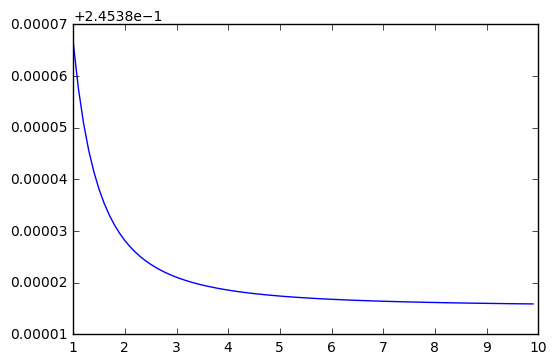

In [7]:
plt.plot(np.arange(freqRange[0], freqRange[1], freqStep),np.real(data))